<a href="https://colab.research.google.com/github/Nitin-Sagar-B/FMML_PROJECTS_AND_LABS/blob/main/Module%206%20Regression%20Lab%202.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Regression Lab 2: Loss Functions



```
Module Coordinator : Nikunj Nawal
```


## Motivation

The main goal of machine learning tasks is to "learn" something about data we feed to our models. But how does the model actually learn anything? To understand this, we need to first understand what objective functions are.

Mathematically, objective functions are a function whose values we desire to minimize/maximize. In the context of machine learning, the objective is commonly referred to as a **loss function**. Loss functions indicate how well the model is doing on the dataset.

The value of the objective function is simply called **loss**. Our goal is to eventually find the best model parameters that has the least average loss on the data after training.


We are familiar with the idea of **error** from the linear regression lab. RMSE is a common loss function used in machine learning. However, there are many other loss functions employed, depending on what the task is (classification, regression etc.). In this lab, we will take a look at some common loss functions, and understand why they are used where they are.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# interactive visualization

# 1. Regression


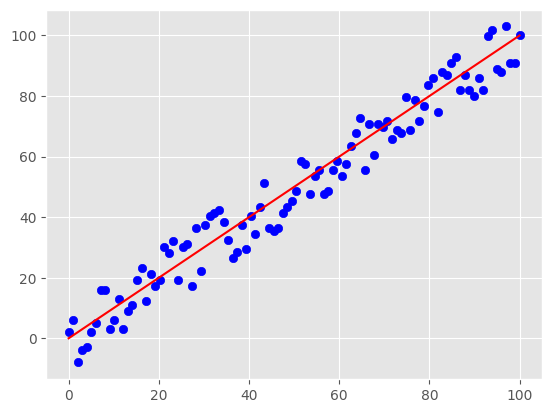

In [2]:
# initializing random data

np.random.seed(0)
x = np.linspace(0,100,100)
y_actual = np.copy(x)
y_pred = x + np.random.randint(-10,10,100)

plt.plot(x,y_actual,color="red")
plt.scatter(x,y_pred,color="blue")
plt.show()

### Mean Squared Error

As we have seen before, the formula for MSE is

$MSE = \frac{1}{m} \sum_{i=1}^n (y-y_p)^2$

The image below depicts a visualization of what the squared error is.

<img src="https://drive.google.com/uc?export=view&id=12jmqRrrqknIWKhwRpgRIJAErBjkEcyx9" width="350" height="350" align="middle"/>

MSE is also referred to as L2 loss.

Typically, we would want the units of error to be the same as the data, so we use Root Mean Squared Error instead.



In [3]:
mse = np.mean((y_actual-y_pred)**2)
print("MSE is: {}".format(mse))
print("RMSE is: {}".format(np.sqrt(mse)))

MSE is: 38.68
RMSE is: 6.219324722186485


### Mean Absolute Error

$MAE = \frac{1}{m} \sum_{i=1}^n |y-y_p|$

MAE is also commonly referred to as L1 loss.

In [4]:
mae = np.mean(np.abs(y_actual-y_pred))
print("MAE is: {}".format(mae))

MAE is: 5.5


MSE penalizes the model for making large errors by squaring the difference. However, this also means that MSE cannot handle outliers well, since they would throw the model off.

On the other hand, MAE is robust to outliers. But, MAE is non-differentiable, making it difficult to perform mathematical operations on it.

Hence, RMSE is most commonly used as a metric for evaluation.

# 2. Classification

Classification tasks involve some data, along with labels assigned to that data. For example, we may have pictures of cats and dogs, and the corresponding labels assigned to those images. We then want to train a model that can predict a label for some input image belonging to either label class (cat or dog).

## The concept of maximum likelihood

Ideally, we would want to obtain a model $\hat{\theta}$ which maximizes the probability of correctly predicting data. Mathematically, the likelihood is:

$ \prod_{i=1}^{N}  \: \hat{\theta_i}^{\theta_i}$

This is because our actual data ($\theta_i$) is either 0 or 1 depending on the label of the data, and our predicted data ($\hat{\theta_i}$) is a probability.

We usually consider the negative log of the likelihood, since log is monotonic and easier to deal with as an optimization problem.

Hence, we have

$MLE = $ arg min $\: - \sum_{i=1}^{N} \theta_i \: log \: \hat{\theta_i}$

\


## Entropy and Cross-Entropy

For some event $x$, we can obtain **information** based on its probability distribution. For example, for some event that occurs with $p=1$, we gain no information. Now, if we flip a coin and see that we obtained heads, we say that we got 1 bit of information.

Thus, the information $I$ of some event $x$ is:

$I = -log_2 \: p(x)$

We say that events with a low probability of occuring give high information, and those with a low probability give low information.

Now, if we have some random variable $X$, its **entropy** is the expected value of the information obtained.

$H(x) = - \sum_{k} p_k \: log \: p_k$

Now, suppose we are trying to correctly predict labels of some data. Let P be the true distribution of the labels, and Q be the predicted distribution of labels.

Cross-Entropy is then defined as:

$H(P,Q) = - \sum_{x} P(x)\: log \: Q(x)$

which is basically the entropy between two probability distributions over the same events.

\


## MLE and Cross-Entropy

So, in the case of classification, the equation for minimization of the cross-entropy between the actual data and the predicted data would be:

arg min $\: -\sum_{i=1}^{N} P(x) \: log \: Q(x)$

$= $ arg min $\: -\sum_{i=1}^{N} \theta_i \: log \: \hat{\theta_i}$


which is exactly the same as what we had obtained for minimizing the negative log likelihood. Hence, the two problems are equivalent.

1/1+e^(-x)

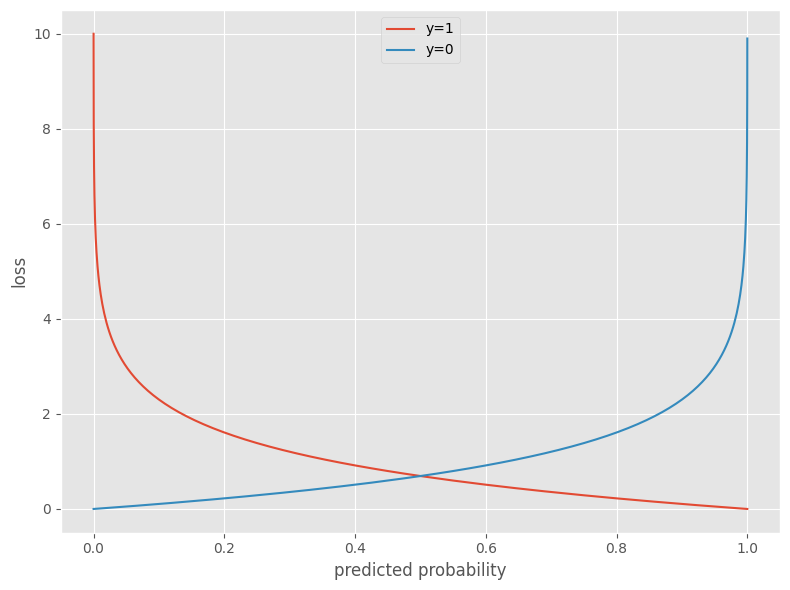

In [5]:
def sigmoid(z):
  return 1/(1 + np.exp(-z))

def cross_entropy_loss(y_,y):
  if y==1:
    return -np.log(y_)

  return -np.log(1-y_)

z = np.arange(-10, 10, 0.1)
h_z = sigmoid(z)

cost_1 = cross_entropy_loss(h_z, 1)
cost_0 = cross_entropy_loss(h_z, 0)

fig, ax = plt.subplots(figsize=(8,6))
plt.plot(h_z, cost_1, label='y=1')
plt.plot(h_z, cost_0, label='y=0')
plt.xlabel('predicted probability')
plt.ylabel('loss')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

## KNN-regression

Till now, we have studied KNN as a classification algorithm, which uses feature similarity and voting to decide the class labels of unseen data.

For regression, we use the same idea: We take the y-values of the k nearest neighbours, and compute their average, which is our predicted y-value. We do this for every x whose value we want to predict.

In the visualization below, we have k=3, and the red dots are the new x-values whose output we want to predict.

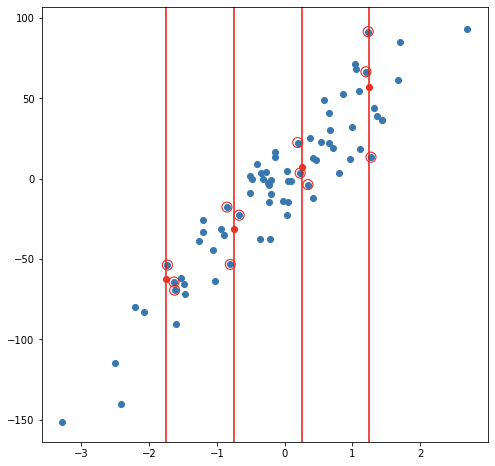

In [6]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import numpy as np

In [7]:
train_path = "https://raw.githubusercontent.com/PranavTadimeti/Regression-lab2/main/BigMart-train.csv"

train = pd.read_csv(train_path)

In [8]:
# Preprocess Data

def preprocess(df):
  mean_weight = df['Item_Weight'].mean()
  df['Item_Weight'].fillna(mean_weight,inplace=True)

  mode_size = df['Outlet_Size'].mode()
  df['Outlet_Size'].fillna(mode_size,inplace=True)

  df.drop(['Item_Identifier','Outlet_Identifier'],axis=1,inplace=True)

  return pd.get_dummies(df)

train = preprocess(train)

train.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,249.8092,1999,3735.1380,0,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,5.92,0.019278,48.2692,2009,443.4228,0,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0
2,17.50,0.016760,141.6180,1999,2097.2700,0,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0
3,19.20,0.000000,182.0950,1998,732.3800,0,0,1,0,0,...,0,0,0,0,0,1,1,0,0,0
4,8.93,0.000000,53.8614,1987,994.7052,0,1,0,0,0,...,1,0,0,0,0,1,0,1,0,0


In [9]:
train , test = train_test_split(train, test_size = 0.3)

x_train = train.drop('Item_Outlet_Sales', axis=1)
y_train = train['Item_Outlet_Sales']

x_test = test.drop('Item_Outlet_Sales', axis = 1)
y_test = test['Item_Outlet_Sales']

In [10]:
scaler = MinMaxScaler(feature_range=(0, 1))

x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled)

x_test_scaled = scaler.fit_transform(x_test)
x_test = pd.DataFrame(x_test_scaled)

In [11]:
def knn_regression(k,x_train,y_train,x_test,y_test):
    model = neighbors.KNeighborsRegressor(n_neighbors = k)

    model.fit(x_train, y_train)
    pred=model.predict(x_test)
    error = sqrt(mean_squared_error(y_test,pred))
    rmse_val.append(error)

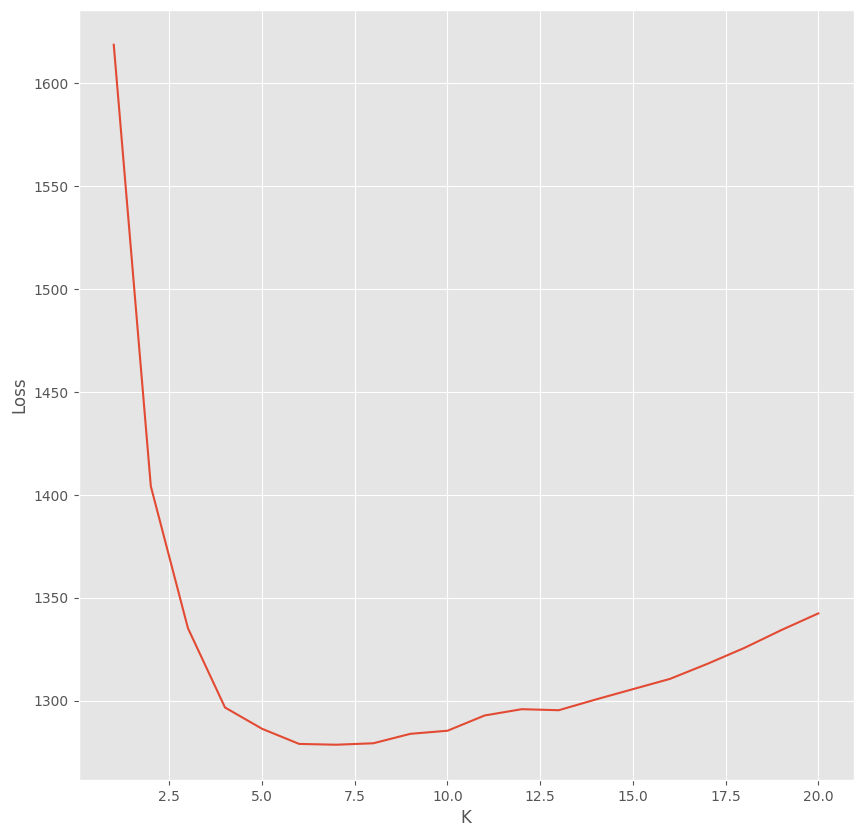

Minimum error 1278.5816281094171 is at k = 6


In [12]:
rmse_val = []

for k in range(1,21):
  knn_regression(k,x_train,y_train,x_test,y_test)

figure = plt.figure(figsize=(10,10))
plt.plot(np.arange(1,21),rmse_val)
plt.xlabel("K")
plt.ylabel("Loss")
plt.show()

rmse_val = np.asarray(rmse_val)
print("Minimum error {} is at k = {}".format(np.min(rmse_val),np.argmin(rmse_val)))

## Exercises

1. Try out these loss functions on regression tasks, and try to understand the model performance based on the loss function.
2. Explore other loss functions and try to understand when and why they are used.
3. Try out KNN-regression on other datasets see which values of K give the best results.

<h1>Excercise - 1

In [13]:
#Excercise 1
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression

# Train a linear regression model
model = LinearRegression()
model.fit(x_train, y_train)

# Make predictions
y_pred = model.predict(x_test)

# Calculate loss functions
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")

MSE: 1381770.8086451201
RMSE: 1175.487477026072
MAE: 872.8599159953069


<h1>Excercise - 2

In [23]:
from sklearn.linear_model import HuberRegressor

# Train a Huber regressor
model = HuberRegressor()
model.fit(x_train, y_train)

# Make predictions
y_pred = model.predict(x_test)

# Calculate Huber loss
huber_loss = model.score(x_test, y_test)
print(f"Huber Loss: {huber_loss}")

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Calculate MAPE
mape = mean_absolute_percentage_error(y_test, y_pred)
print(f"MAPE on given dataset: {mape}%")

from sklearn.metrics import r2_score

# Calculate R^2 Score
r2 = r2_score(y_test, y_pred)
print(f"R^2 Score on given dataset: {r2}")

Huber Loss: 0.5497969496598321
MAPE on given dataset: 96.41404661259409%
R^2 Score on given dataset: 0.5497969496598321


What I understood and observed about these loss functions:

1. **Huber Loss**: I observed that the Huber Loss is a loss function utilized in robust regression. It's less sensitive to outliers in data compared to the squared error loss. This function combines the properties of both quadratic loss (squared error) and absolute loss (absolute error), providing a more robust solution. It's typically used when there's a need to avoid assigning excessive weight to outliers.

2. **Mean Absolute Percentage Error (MAPE)**: I understand that the Mean Absolute Percentage Error (MAPE) is a statistical measure used to determine the accuracy of a forecasting method. It calculates the average of the absolute percentage errors of each entry in a dataset. This helps in determining how accurate the forecasted quantities were in comparison with the actual quantities. It's often used due to its ease of interpretation. For instance, a MAPE value of 14% implies that the average difference between the forecasted value and the actual value is 14%.

3. **R^2 Score**: Also known as the coefficient of determination, the R^2 score measures the predictive power of a statistical model. The value of R^2 can range from 0 to 1. An R^2 of 1 indicates that the regression predictions perfectly fit the data. Conversely, an R^2 of 0 suggests that the data is random or cannot be fit to the model.

<h1>Excercise - 3

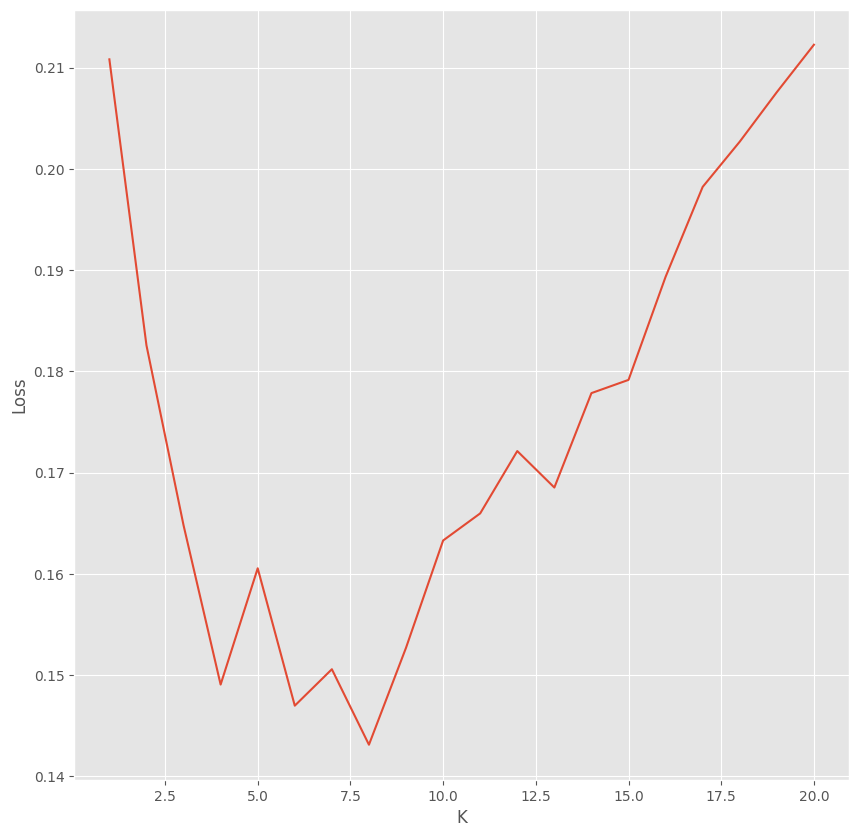

Minimum error 0.14312970031098057 is at k = 8


In [25]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import neighbors
from math import sqrt
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

# Load the Iris dataset
iris = datasets.load_iris()
iris_data = iris.data
iris_target = iris.target

# Split the data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(iris_data, iris_target, test_size = 0.3, random_state = 1)

# Scale the features
scaler = MinMaxScaler(feature_range=(0, 1))

x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled)

x_test_scaled = scaler.transform(x_test)
x_test = pd.DataFrame(x_test_scaled)

# Define the KNN regression function
def knn_regression(k,x_train,y_train,x_test,y_test):
    model = neighbors.KNeighborsRegressor(n_neighbors = k)
    model.fit(x_train, y_train)
    pred=model.predict(x_test)
    error = sqrt(mean_squared_error(y_test,pred))
    rmse_val.append(error)

# Apply KNN regression for different values of k
rmse_val = []
for k in range(1,21):
  knn_regression(k,x_train,y_train,x_test,y_test)

# Plot the RMSE values
figure = plt.figure(figsize=(10,10))
plt.plot(np.arange(1,21),rmse_val)
plt.xlabel("K")
plt.ylabel("Loss")
plt.show()

# Print the minimum error and the corresponding k value
rmse_val = np.asarray(rmse_val)
print("Minimum error {} is at k = {}".format(np.min(rmse_val),np.argmin(rmse_val)+1))

I performed the knn regression on sklearn's iris dataset and observed that minimum error was found at k = 8


---
<h1>End of the lab



